# 2022-03-08 - Compound Gradients for K<sub>d</sub>
## Protein Thawing and Conc Checks

`id:41` I think

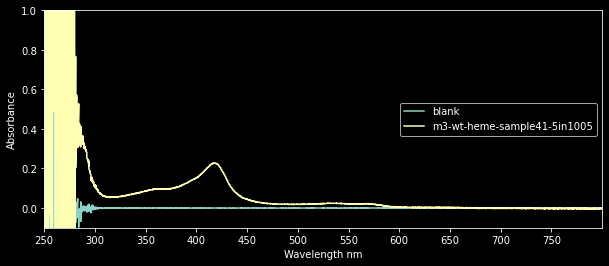

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import uv

spec = uv.P450('uv-vis/2022-03-07-00.2-prot-conc.csv')
uv.plot_traces(spec.df)

In [2]:
spec.concs(95)

,blank,m3-wt-heme-sample41-5in1005
420,0.0,2.351560
420,0.0,2.356056
420,0.0,2.359657
420,0.0,2.373075


In [3]:
conc = 2.373075 / (5/1005)

print(conc)

v2 = 20_000 
assert v2 >  384 * 40 * 1.2

def v1(c1,v2,c2):
    return (v2 * c2) / c1

vol = v1(conc, v2, 8)
print(f'{vol} um prot in {v2/1000} ml buffer')

476.98807500000004
335.43815534591715 um prot in 20.0 ml buffer


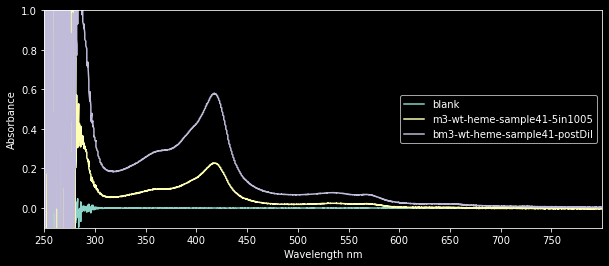

,blank,m3-wt-heme-sample41-5in1005,bm3-wt-heme-sample41-postDil
420,0.0,2.351560,5.984556
420,0.0,2.356056,6.005072
420,0.0,2.359657,6.023636
420,0.0,2.373075,6.036537


In [4]:
spec2 = uv.P450('uv-vis/2022-03-07-00.2-prot-conc2.csv')
uv.plot_traces(spec2.df)

spec2.concs(95)

## Final protein concentration - 6 uM

Used Synbio platereader, data parser needs adapting.

I used 40uM of protein/buffer in each well.
Gave the protein a centrifuge before using and filtered it through a 45uM peice before using. 
Looked like I got rid of a real precipitate.
That's good.

---

# 2022-03-09 - Hamilton Run

## [Background](http://localhost:8888/doc/tree/00.2-design.ipynb#2022-03-08----Hamilton)
Using the Hamilton robot for dispensing protein and buffer.

## Aim
Compare with dispensing with pipette as yesterday.

## Notes

- **Protein** same as yesterday, had been on ice overnight. 
    - Centrifuged at 20,000 rpm for 3 min (no cooling available). 
    - Time constrained so didn't take a fresh spec, just repeated yesterday. (22um filtered buffer first)
    - When dispensing in the Hamilton the fluid level (20 ml) was too low, so  I had to dilute it more in buffer (total ~ 35 ml) on the fly. Took a spec after:

## Protein Dispensing
It's in worse shape than yesterday, the absorbance trace is less defined

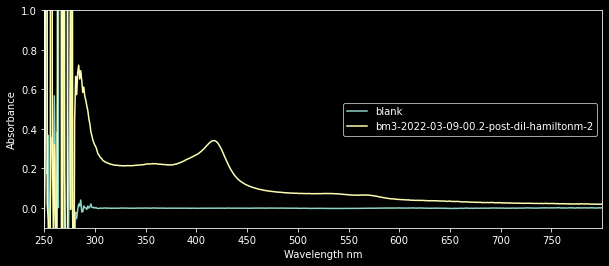

In [5]:
import uv
data = uv.P450('uv-vis/2022-03-09-00.2-hamilton-post-dil-spec.csv')
uv.plot_traces(data.df)

## Qtf. Degradation
It'd usually be the 420nm / 280nm (*RZ*) but I'm not using uv cuvettes so I can't use 280nm.
The trace is unreliable < 300nm.

I'll aim for the lump at 350 nm instead.

In [38]:
print('2022-03-08')
print(spec.df.loc[420,:].sample(1).loc[420,:] / \
spec.df.loc[350,:].sample(1).loc[350,:])
print()
print('2022-03-09')
print(data.df.loc[420,:] / data.df.loc[350,:])

2022-03-08
blank                          0.343826
m3-wt-heme-sample41-5in1005    2.628401
dtype: float64

2022-03-09
blank                                      -5.828084
bm3-2022-03-09-00.2-post-dil-hamiltonm-2    1.514819
dtype: float64


- `2022-03-08` : 2.628401
- `2022-03-09` : 1.514819

If $\frac{A_{420}}{A_{350}}$ is an ok proxy for $\frac{A_{420}}{A_{280}}$, then it's fair to say my protein is degrading.

The way the latter curve slopes up to the left I think suggests scattering.

In [7]:
data.concs(95)

blank                                       0.000000
bm3-2022-03-09-00.2-post-dil-hamiltonm-2    3.532422
Name: P450 conc/uM, dtype: float64

Final conc: 3.53 uM

Hamilton Dispensing went fine otherwise

Plates read at 30C  with ~2 mins preheating time on the Synbio Clariostar.
It has a plate stacker that I'd like to use. 

Data:
``` sh
platereader
...
├── 2022-03-09-00.2-hamilton-ctrl.CSV
└── 2022-03-09-00.2-hamilton-test.CSV
```

## [Analysis](00.2-analysis.ipynb)